In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from datetime import timedelta
import pmdarima as pm
from pmdarima.arima import auto_arima
%matplotlib inline

In [79]:
# function for reading the csv
global location
location = "Melbourne Central"
def new_read(csv,total_hrs=None):
    df = pd.read_csv(csv)
    df = df[["Date","Hour",location]]
    df[location] = pd.to_numeric(df[location],errors="coerce")
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
    df['Date'] = pd.to_datetime(df['Date']) + pd.to_timedelta(df['Hour'], unit='h')
    df = df[["Date",location]]
    df.set_index("Date", drop=True, inplace=True)
    if total_hrs:
        df = df[:total_hrs]
    return df

In [80]:

files = os.path.join("..\\dataset\\monthly\\", "ds*.csv")
files = glob.glob(files)
df = pd.concat(map(new_read, files))
df


,Melbourne Central
Date,
2022-02-01 00:00:00,237
2022-02-01 01:00:00,173
2022-02-01 02:00:00,92
2022-02-01 03:00:00,36
2022-02-01 04:00:00,42
...,...
2022-03-31 19:00:00,1767
2022-03-31 20:00:00,1461
2022-03-31 21:00:00,1433


In [81]:
df = df.dropna()
df

,Melbourne Central
Date,
2022-02-01 00:00:00,237
2022-02-01 01:00:00,173
2022-02-01 02:00:00,92
2022-02-01 03:00:00,36
2022-02-01 04:00:00,42
...,...
2022-03-31 19:00:00,1767
2022-03-31 20:00:00,1461
2022-03-31 21:00:00,1433


<AxesSubplot:xlabel='Date'>

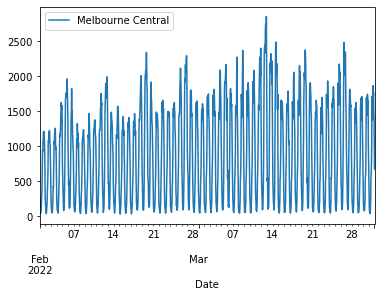

In [82]:
df.plot(kind = 'line')

In [83]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.01, False)

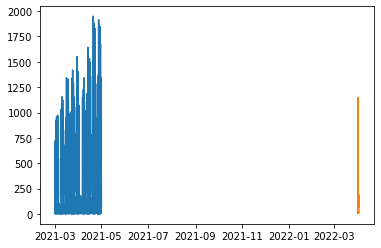

In [22]:
# Alternative
train = df
test = new_read("..\April_2022.csv",total_hrs=48) 
plt.plot(train)
plt.plot(test)

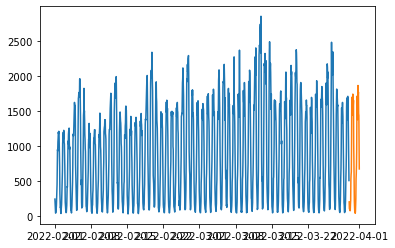

In [84]:
train = df[:-48]
test = df[-48:]
plt.plot(train)
plt.plot(test)

In [85]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,max_p=5, max_d=5, max_q=5, start_P=0,D=1, start_Q=0, max_P=5, max_D=5,max_Q=5,m=12,seasonal=True,error_action='warn',trace=True,supress_warnings=True, stepwise=True, random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=20060.058, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.62 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=17368.485, Time=1.04 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.32 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=7.14 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=4.79 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=12.65 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=17363.991, Time=5.89 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=4.14 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.53 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=22.26 sec
 ARIMA(

In [ ]:
# alternative
arima_model = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

arima_model.summary()

In [33]:
#alternative
prediction = pd.DataFrame(arima_model.predict(n_periods=48),index=test.index)
prediction.columns = ['predicted_count']
prediction["actual_count"] = test[location]
prediction

,predicted_count,actual_count
Date,,
2021-04-28 23:00:00,100.439900,21.0
2021-04-29 00:00:00,34.412479,11.0
2021-04-29 01:00:00,52.997609,5.0
2021-04-29 02:00:00,65.786343,5.0
2021-04-29 04:00:00,60.185361,2.0
2021-04-29 05:00:00,101.028816,29.0
2021-04-29 06:00:00,250.830655,200.0
2021-04-29 07:00:00,418.041906,801.0
2021-04-29 08:00:00,751.424892,1848.0


In [ ]:
#alternative
#plt.plot(train, label='Training')
plt.plot(prediction["actual_count"], label='Test')
plt.plot(prediction["predicted_count"], label='Prediction')
plt.legend(loc ='upper left')
plt.show()

q:\Snake\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


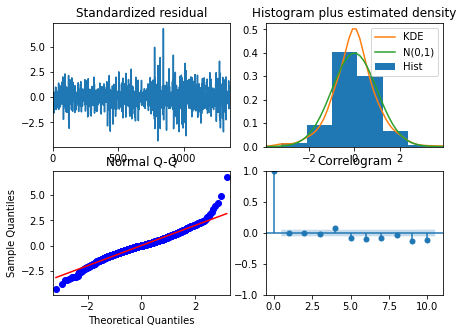

In [86]:
arima_model.plot_diagnostics(figsize=(7,5))
plt.show()

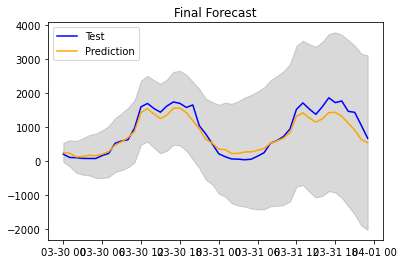

In [87]:
# Forecast
n_periods = len(test)
fc, confint = arima_model.predict(n_periods=n_periods, return_conf_int=True)


index_of_fc = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
# plt.plot(train)
plt.plot(test, color="blue", label='Test')
plt.plot(fc_series, color='orange', label='Prediction')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.legend(loc ='upper left')
plt.show()